Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                validation_split=0.2,
                                                                subset="training",
                                                                seed=123,
                                                                image_size=(img_height,img_width),
                                                                batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                                validation_split=0.2,
                                                                subset="validation",
                                                                seed=123,
                                                                image_size=(img_height,img_width),
                                                                batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

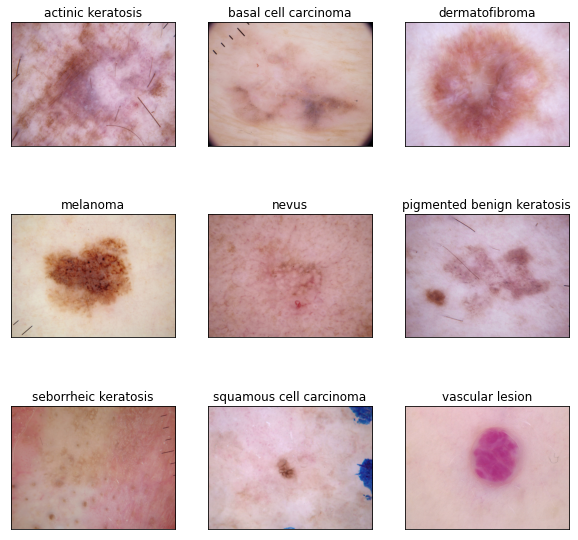

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
from skimage import io
import  glob


fig = plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        Data_path = os.path.join(data_dir_train, class_names[i], '*')
        Data_path = glob.glob(Data_path)

        image = io.imread(Data_path[1])
        ax.set_title(class_names[i])
        plt.imshow(image)      
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 97s 388ms/step - loss: 3.7900 - accuracy: 0.3396 - val_loss: 3.6398 - val_accuracy: 0.0940
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 1.2032 - accuracy: 0.5518 - val_loss: 5.4470 - val_accuracy: 0.0984
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 0.8223 - accuracy: 0.7148 - val_loss: 5.2176 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 0.5885 - accuracy: 0.8018 - val_loss: 5.3952 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 3s 48ms/step - loss: 0.3992 - accuracy: 0.8612 - val_loss: 4.2230 - val_accuracy: 0.2371
Epoch 6/20
56/56 [==============================] - 3s 48ms/step - loss: 0.2564 - accuracy: 0.9231 - val_loss: 3.8353 - val_accuracy: 0.2908
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 0.1961 - accuracy: 0.9328 - val_loss: 2.6407 - val_accuracy: 0.3848
Epoch 8/20


### Visualizing training results

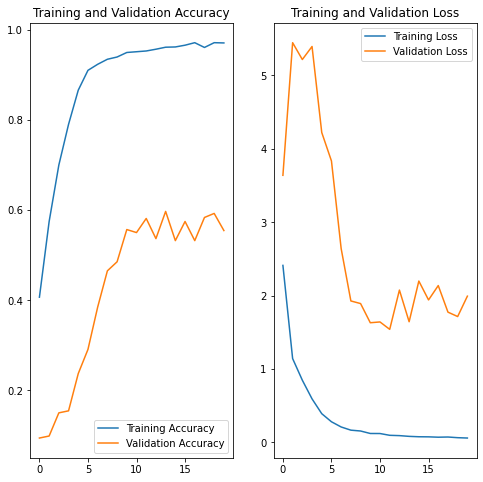

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### Findings : There is a huge difference between train and validation test accuracies and model is overfitting on the training data

In [16]:
#!pip install numpy==1.19.2

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_aug = Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2, input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
])

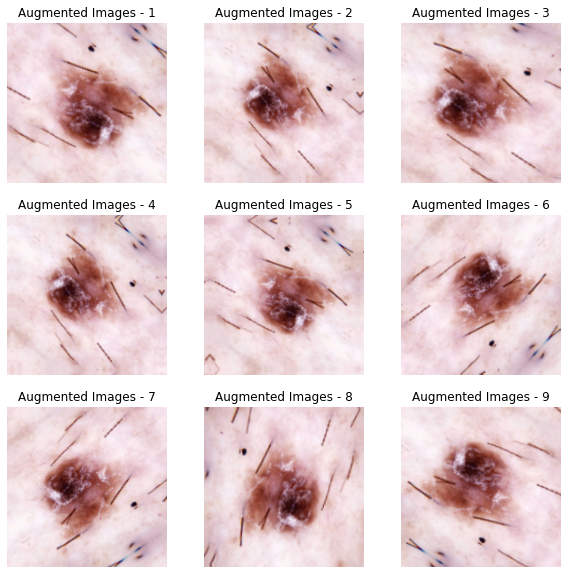

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        aug_images = data_aug(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(aug_images[0].numpy().astype("uint8"))
        plt.axis("off")
        plt.title('Augmented Images - '+str(i+1))

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model2 = Sequential([
  data_aug,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

### Compiling the model

In [20]:
## Your code goes here
model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model2.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/20
56/56 [==============================] - 4s 59ms/step - loss: 4.3402 - accuracy: 0.2690 - val_loss: 3.6485 - val_accuracy: 0.0872
Epoch 2/20
56/56 [==============================] - 3s 56ms/step - loss: 1.4236 - accuracy: 0.4976 - val_loss: 5.0084 - val_accuracy: 0.0872
Epoch 3/20
56/56 [==============================] - 3s 56ms/step - loss: 1.4240 - accuracy: 0.4644 - val_loss: 5.3649 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 3s 56ms/step - loss: 1.2207 - accuracy: 0.5562 - val_loss: 4.5545 - val_accuracy: 0.1051
Epoch 5/20
56/56 [==============================] - 3s 56ms/step - loss: 1.1744 - accuracy: 0.5638 - val_loss: 3.7935 - val_accuracy: 0.2394
Epoch 6/20
56/56 [==============================] - 3s 55ms/step - loss: 1.1102 - accuracy: 0.5760 - val_loss: 2.3632 - val_accuracy: 0.2998
Epoch 7/20
56/56 [==============================] - 3s 56ms/step - loss: 1.0849 - accuracy: 0.5945 - val_loss: 2.6537 - val_accuracy: 0.3266
Epoch 8/20
56

### Visualizing the results

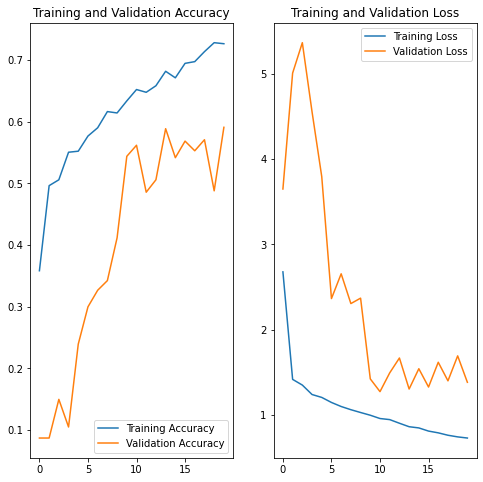

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Findings : Overall accuracy of the model has been dropped for both train and validation data and thus the model is underfitting on the train data.And the improvement factor is difference between train and validation data accuracy has been reduced and thus data augmentation has helped the model to learn importat charachteristics of image.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.
import pandas as pd 

df_class = pd.DataFrame(np.zeros((9,3)),columns=['Class','Count','Percentage Dist'])
for i in range(len(class_names)):
    Data_path = os.path.join(data_dir_train, class_names[i], '*')
    Data_path = glob.glob(Data_path)
    df_class.loc[i,'Class'] = class_names[i]
    df_class.loc[i,'Count'] = len(Data_path)
    df_class.loc[i,'Percentage Dist'] = (len(Data_path)/image_count_train)*100

df_class.sort_values(by=['Percentage Dist'])

,Class,Count,Percentage Dist
6,seborrheic keratosis,77.0,3.439035
2,dermatofibroma,95.0,4.242966
0,actinic keratosis,114.0,5.091559
8,vascular lesion,139.0,6.208129
7,squamous cell carcinoma,181.0,8.083966
4,nevus,357.0,15.944618
1,basal cell carcinoma,376.0,16.793211
3,melanoma,438.0,19.562305
5,pigmented benign keratosis,462.0,20.634212


In [24]:
from glob import  glob
path_list = [ x for x in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
path_list

['Train/nevus/ISIC_0028941.jpg',
 'Train/nevus/ISIC_0025368.jpg',
 'Train/nevus/ISIC_0000391.jpg',
 'Train/nevus/ISIC_0000452.jpg',
 'Train/nevus/ISIC_0000366.jpg',
 'Train/nevus/ISIC_0026905.jpg',
 'Train/nevus/ISIC_0000359.jpg',
 'Train/nevus/ISIC_0000226.jpg',
 'Train/nevus/ISIC_0000061.jpg',
 'Train/nevus/ISIC_0000460.jpg',
 'Train/nevus/ISIC_0000448.jpg',
 'Train/nevus/ISIC_0024948.jpg',
 'Train/nevus/ISIC_0000365.jpg',
 'Train/nevus/ISIC_0000543.jpg',
 'Train/nevus/ISIC_0000381.jpg',
 'Train/nevus/ISIC_0000472.jpg',
 'Train/nevus/ISIC_0025825.jpg',
 'Train/nevus/ISIC_0027802.jpg',
 'Train/nevus/ISIC_0000339.jpg',
 'Train/nevus/ISIC_0026212.jpg',
 'Train/nevus/ISIC_0000067.jpg',
 'Train/nevus/ISIC_0026194.jpg',
 'Train/nevus/ISIC_0000433.jpg',
 'Train/nevus/ISIC_0000496.jpg',
 'Train/nevus/ISIC_0000378.jpg',
 'Train/nevus/ISIC_0000236.jpg',
 'Train/nevus/ISIC_0027254.jpg',
 'Train/nevus/ISIC_0000447.jpg',
 'Train/nevus/ISIC_0000493.jpg',
 'Train/nevus/ISIC_0000536.jpg',
 'Train/ne

In [25]:
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, "*", "*.jpg")) ]
lesion_list

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [26]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original

{'Train/nevus/ISIC_0028941.jpg': 'nevus',
 'Train/nevus/ISIC_0025368.jpg': 'nevus',
 'Train/nevus/ISIC_0000391.jpg': 'nevus',
 'Train/nevus/ISIC_0000452.jpg': 'nevus',
 'Train/nevus/ISIC_0000366.jpg': 'nevus',
 'Train/nevus/ISIC_0026905.jpg': 'nevus',
 'Train/nevus/ISIC_0000359.jpg': 'nevus',
 'Train/nevus/ISIC_0000226.jpg': 'nevus',
 'Train/nevus/ISIC_0000061.jpg': 'nevus',
 'Train/nevus/ISIC_0000460.jpg': 'nevus',
 'Train/nevus/ISIC_0000448.jpg': 'nevus',
 'Train/nevus/ISIC_0024948.jpg': 'nevus',
 'Train/nevus/ISIC_0000365.jpg': 'nevus',
 'Train/nevus/ISIC_0000543.jpg': 'nevus',
 'Train/nevus/ISIC_0000381.jpg': 'nevus',
 'Train/nevus/ISIC_0000472.jpg': 'nevus',
 'Train/nevus/ISIC_0025825.jpg': 'nevus',
 'Train/nevus/ISIC_0027802.jpg': 'nevus',
 'Train/nevus/ISIC_0000339.jpg': 'nevus',
 'Train/nevus/ISIC_0026212.jpg': 'nevus',
 'Train/nevus/ISIC_0000067.jpg': 'nevus',
 'Train/nevus/ISIC_0026194.jpg': 'nevus',
 'Train/nevus/ISIC_0000433.jpg': 'nevus',
 'Train/nevus/ISIC_0000496.jpg': '

In [27]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns= ['Path', 'Label'])
original_df.head()

,Path,Label
0,Train/nevus/ISIC_0028941.jpg,nevus
1,Train/nevus/ISIC_0025368.jpg,nevus
2,Train/nevus/ISIC_0000391.jpg,nevus
3,Train/nevus/ISIC_0000452.jpg,nevus
4,Train/nevus/ISIC_0000366.jpg,nevus


In [28]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- 'seborrheic keratosis' has least number of samples (77 samples).


#### - Which classes dominate the data in terms proportionate number of samples?
- 'pigmented benign keratosis' has highest proportionate number of samples (20.63%)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [29]:
!pip install Augmentor

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 829 kB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 66.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 9.1 MB/s  eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=174d9b7b27012f17fea17bdb34fcbaff7e9ec5b0c4f1acb67d800c83021985d7
  Stored in directory: /home/ubuntu/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future
  Consider adding th

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F21842A4B20>: 100%|██████████| 500/500 [00:15<00:00, 31.99 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2184365CA0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F21842558B0>: 100%|██████████| 500/500 [00:15<00:00, 33.03 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F2184263340>: 100%|██████████| 500/500 [00:16<00:00, 30.33 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F21842CA1F0>: 100%|██████████| 500/500 [01:40<00:00,  5.00 Samples/s]                   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2184307AF0>: 100%|██████████| 500/500 [01:20<00:00,  6.25 Samples/s]                    
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F218429A400>:   0%|          | 1/500 [00:00<00:31, 15.92 Samples/s]

Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2184569100>: 100%|██████████| 500/500 [00:16<00:00, 30.42 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F218429A340>: 100%|██████████| 500/500 [00:39<00:00, 12.78 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F21912AC550>: 100%|██████████| 500/500 [00:16<00:00, 29.73 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F21845668E0>:   0%|          | 1/500 [00:00<01:32,  5.41 Samples/s]

Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F2184441070>: 100%|██████████| 500/500 [00:16<00:00, 30.34 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
from glob import  glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Train/nevus/output/nevus_original_ISIC_0024771.jpg_3bb790c1-1991-4db4-b53f-55bfa2889446.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000264.jpg_f1d9f4b5-6683-4465-81b9-5d1f46f5445b.jpg',
 'Train/nevus/output/nevus_original_ISIC_0026702.jpg_7998bdfb-4d15-4f8c-8e59-606484e4594c.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000350.jpg_a277472b-e80a-4215-bf25-596010a4553e.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000081.jpg_9109bbe3-1824-4251-9cff-e3e2bc34cb77.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000323.jpg_5ae23a4b-2b97-4460-826f-0beed2867fc0.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000392.jpg_f2ca7aa4-c2f7-492d-9bfb-c2e03775628f.jpg',
 'Train/nevus/output/nevus_original_ISIC_0028393.jpg_7b261fe6-68fd-40f2-9fae-b5c8d687d427.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000073.jpg_0fc1fed4-f09b-4e33-a089-7b680b7dae2a.jpg',
 'Train/nevus/output/nevus_original_ISIC_0000060.jpg_a6f77dc1-1bd8-4970-8fcc-13ed14a8d341.jpg',
 'Train/nevus/output/nevus_original_ISIC

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [36]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train="Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
## your code goes here
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here
model3.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model3.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/30
169/169 [==============================] - 56s 324ms/step - loss: 3.0781 - accuracy: 0.3895 - val_loss: 6.7501 - val_accuracy: 0.1084
Epoch 2/30
169/169 [==============================] - 37s 213ms/step - loss: 0.8543 - accuracy: 0.6949 - val_loss: 2.2796 - val_accuracy: 0.3519
Epoch 3/30
169/169 [==============================] - 38s 218ms/step - loss: 0.4977 - accuracy: 0.8257 - val_loss: 0.9346 - val_accuracy: 0.6897
Epoch 4/30
169/169 [==============================] - 38s 218ms/step - loss: 0.3383 - accuracy: 0.8814 - val_loss: 0.5651 - val_accuracy: 0.8174
Epoch 5/30
169/169 [==============================] - 38s 218ms/step - loss: 0.2598 - accuracy: 0.9032 - val_loss: 0.5050 - val_accuracy: 0.8107
Epoch 6/30
169/169 [==============================] - 37s 212ms/step - loss: 0.2001 - accuracy: 0.9247 - val_loss: 0.5528 - val_accuracy: 0.7906
Epoch 7/30
169/169 [==============================] - 38s 217ms/step - loss: 0.1728 - accuracy: 0.9314 - val_loss: 0.4506 - val_ac

#### **Todo:**  Visualize the model results

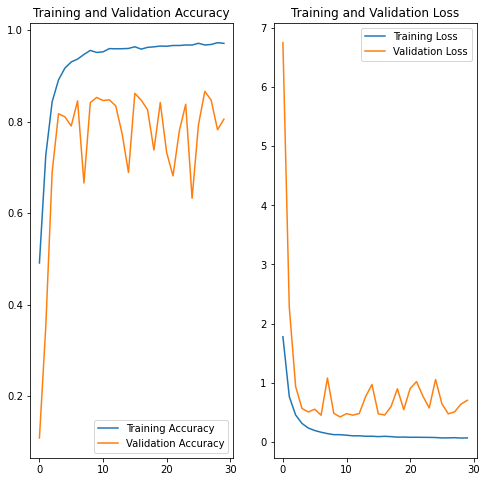

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Findings : The trained model has performed good on both train and validation data set. And, thus class rebalance has helped for better model performance and helped in overcomming overfitting and underfitting problem.